In [1427]:
import sys
from PIL import Image, ImageDraw, ImageFilter
import random
import numpy as np

In [1656]:
class ArtGenerator():
    """An ArtGenerator object has a main attribute, self.img 
    * When the object is created self.img is set as a clean image 
        - this "base image" will have background color and dimensions according to args in __init__
    * There are methods to generate shapes with random characteristics in self.img (lines, arcs, etc)
    * And methods to treat self.img, like smoothing
    """

    def __init__(self, bg_type = 'white', img_size = (600,400)):
        """initialize object and creates the base image
        * The image backgorund color will be selected according to "bg_type",
        bg_type 'light' or 'dark' creates a random background color
        
        Keyword arguments:
        bg_type -- Define the backgorund color, may be 'white','black', 'light' or 'dark' (default 'white')
        img_size -- A 2-tuple, containing (width, height) in pixels
        """
        self.bg_type = bg_type
        
        # Set background colors according to "bg_type"
        if bg_type == 'white':
            rgb_color = (255,255,255)
        elif bg_type == 'black':
            rgb_color = (0,0,0)
        # Select a random background with high values for RGB colors (close to white)
        elif bg_type == 'light':
            rgb_color = tuple([random.randrange(235,255) for i in range(3)])
        # Select a random background with low values for RGB colors (close to black)
        elif bg_type == 'dark':
            rgb_color = tuple([random.randrange(50,100) for i in range(3)])
        else:
            raise Exception("Arg bg_type must be 'white','black', 'light' or 'dark'")

        # Create a new image
        self.img =  Image.new('RGB',img_size,color=rgb_color) 

        
    def create_color(self):
        """Return a random RGB color based on the background_type(bg_type)
        * The selection range used will aim to create a color that
        contrast with the background color.
        """
        
        # Sets color based on backgrond type
        if self.bg_type == 'white' or self.bg_type == 'light':
            color = tuple([random.randrange(50,100) for i in range(3)])
        elif self.bg_type == 'black' or self.bg_type == 'dark':
            color = tuple([random.randrange(100,200) for i in range(3)])
        
        return color
    
    def draw_line(self,qnt_lines = 1,random_qnt_lines = False,width = 1,sequential_lines = True):
        """Draws one or more lines with random coordinates and color in the base image (self.img)
        
        Keyword arguments:
        qnt_lines -- number of lines (default 1)
        random_qnt_lines -- if True set qnt_lines = random value between 2-5 lines
        width -- line width
        sequential_lines -- true creates continuous line, false separate lines
        """
        
        # Sets line color (random)
        line_color = self.create_color()

        # Draw continuous line
        if sequential_lines == True:
            line_coords = []
            if random_qnt_lines == True:
                qnt_points = random.randrange(2,6)
            else:
                qnt_points = qnt_lines +1
            # Random coordinates
            for n in range(qnt_points):
                point_x = random.randrange(0,self.img.size[0])
                point_y = random.randrange(0,self.img.size[1])
                coord_n = [point_x,point_y]
                line_coords = coord_n + line_coords
            # Draw line
            draw = ImageDraw.Draw(self.img)
            draw.line(line_coords, fill= line_color,width = width)
        # Draw separate lines
        elif sequential_lines == False:
            if random_qnt_lines == True:
                qnt_lines = random.randrange(1,3)
                
            for line in range(qnt_lines):
                # Create the line coordinate points
                line_coords = []
                for i in range(2):
                    point_x = random.randrange(0,self.img.size[0])
                    point_y = random.randrange(0,self.img.size[1])
                    coord_i = [point_x,point_y]
                    line_coords = line_coords + coord_i
                # Draw line 
                draw = ImageDraw.Draw(self.img)
                draw.line(line_coords, fill= line_color,width = width, joint = 'curve')
                
    def draw_arc(self, fill_arc = True):
        """Draws one arc with random coordinates and color in the base image (self.img)
        
        Keyword arguments:
        fill_arc -- True Create a filled arc, False just the line
        """
        
        # Sets arc color (random)
        arc_color = self.create_color()
        
        # Arc Coordinates (x2 > x1, y2 >y1)
        arc_coords = []
        for i in range(2):
            if i == 0:
                point_x1 = random.randrange(0,self.img.size[0])
                point_y1 = random.randrange(0,self.img.size[1])
                coord_i = [point_x1,point_y1]
            else:
                point_x2 = random.randrange(point_x1,self.img.size[0])
                point_y2 = random.randrange(point_y1,self.img.size[1])  
                coord_i = [point_x2,point_y2]    
            arc_coords = arc_coords + coord_i
    
        # Arc angles
        start_angle =  random.randrange(0,180)
        end_angle = random.randrange(start_angle + 50,start_angle + 200)

        # Draw arc 
        draw = ImageDraw.Draw(self.img)
        if fill_arc == True:
            draw.chord(arc_coords, start_angle, end_angle, fill=arc_color, width=1)
        elif fill_arc == False:
            draw.arc(arc_coords, start_angle, end_angle, fill=arc_color, width=1)

            
    def draw_ellipse(self):
        """Draws one ellipse with random coordinates and color in the base image (self.img)
        """
        # Sets ellipse color (random)
        elp_color = self.create_color()
        
        # Elipse coords - the ellipse cannot be too big or it will occupy the entire image,
        # let's set it as ~ 1/3 of the img size (máx)
        max_length = int((self.img.size[0] + self.img.size[1])/6)
        elp_coords = []
        for i in range(2):
            if i == 0:
                point_x1 = random.randrange(0,self.img.size[0])
                point_y1 = random.randrange(0,self.img.size[1])
                coord_i = [point_x1,point_y1]
            else:
                point_x2 = random.randrange(point_x1 ,point_x1 + max_length)
                point_y2 = random.randrange(point_y1 ,point_y1 + max_length)  
                coord_i = [point_x2,point_y2]    
            elp_coords = elp_coords + coord_i    
    
        draw = ImageDraw.Draw(self.img)
        draw.ellipse(elp_coords, fill=elp_color, width=1)
        
        
    def draw_points(self,pts_qty = 10, randon_qty = True, select_quadrant = True):
        """Draws points in the base image (self.img)
        
        Keyword arguments:
        pts_qty -- Number of points
        randon_qty -- if True, ignore pts_qty and draw a random number between 1-30
        select_quadrant -- if True, points will be drawn in a restrict random part of image
        """ 
        
        # Sets points color (random)
        points_color = self.create_color()
        # Set points qty
        if randon_qty == True:
            pts_qty = random.randrange(1,30)
        # Draw Points
        if select_quadrant == False:
            draw = ImageDraw.Draw(self.img)
            for p in range(pts_qty):
                random_coord = (random.randrange(0,self.img.size[0]),random.randrange(0,self.img.size[1]))
                draw.point(random_coord, fill=points_color)
        if select_quadrant == True:
            draw = ImageDraw.Draw(self.img)
            x_min = (random.randrange(0,self.img.size[0]- int(self.img.size[0]/4)))
            x_max = (x_min+int(self.img.size[0]/3))
            y_min = (random.randrange(0,self.img.size[1]- int(self.img.size[1]/4)))
            y_max = (y_min+int(self.img.size[1]/3)) 
            
            for p in range(pts_qty):
                random_coord = (random.randrange(x_min,x_max),random.randrange(y_min,y_max))
                draw.point(random_coord, fill=points_color)
                                      
                                         
    def smooth_lines(self, random_blur = True):
        """Smooth lines by a random factor or by 0.5 (slightly smooth) 
        
        Keyword arguments:
        random_blur -- True set blur factor  = random float between 0.2-4
        """
          
        if random_blur == True:
        # Random float 
            blur_factor = random.randrange(1,4,1)/random.randrange(1,6)
        elif random_blur == False:
            blur_factor = 0.5 
        # Apply filters
        self.img = self.img.filter(ImageFilter.SMOOTH_MORE)
        self.img = self.img.filter(ImageFilter.BoxBlur(blur_factor))


In [1657]:
def create_modern_art():

    # p --  probabilities associated with each entry
    random_type = np.random.choice(['light','dark','white','black'], p = (0.45,0.45,0.05,0.05))
    im = ArtGenerator(bg_type = random_type)

    # Draw 1-3 Groups of lines, i.e. lines of same color (1% chance of 0 lines)
    qty_lines = np.random.choice([1,2,3,0], p = (0.33,0.33,0.33,0.01))
    for line in range(qty_lines):
        # Draw a random line
        im.draw_line(random_qnt_lines = True,
                     width = np.random.choice([1,5,2,3,4], p = (0.35,0.35,0.1,0.1,0.1)), 
                     sequential_lines = random.choice([True,False]))

    # Draw 1-3 Arcs 1% chance of 0 arcs)
    qty_arcs = np.random.choice([1,2,3,0], p = (0.33,0.33,0.33,0.01))
    for arc in range(qty_arcs):
        # Draw a random line
        im.draw_arc(fill_arc = random.choice([True,False]))

    # 30% Chance of drawing a ellipse
    choice = np.random.choice([True, False], p = (0.3,0.7))
    if choice == True:
        im.draw_ellipse()
        
    # Smooth lines
    im.smooth_lines()
            
    # 30% Chance of drawing points
    choice = np.random.choice([True, False], p = (0.3,0.7))
    if choice == True:
        im.draw_points(randon_qty = True, select_quadrant = random.choice([True,False]))
    

    return im.img

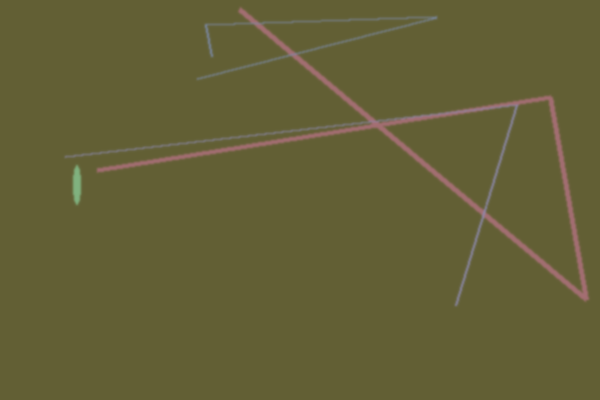

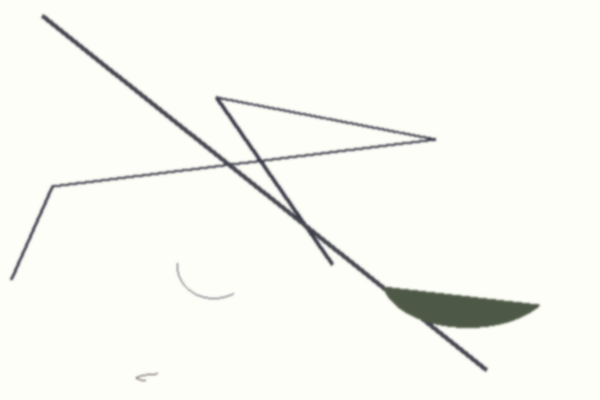

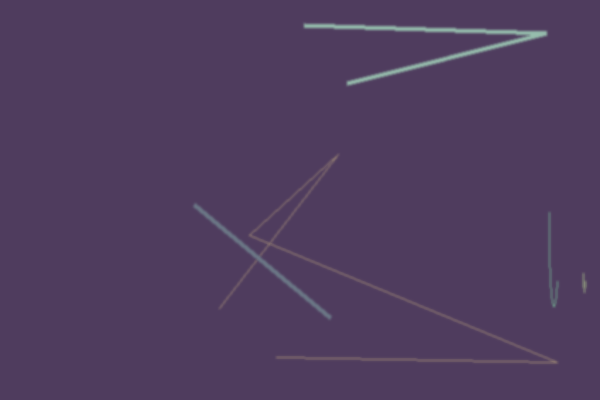

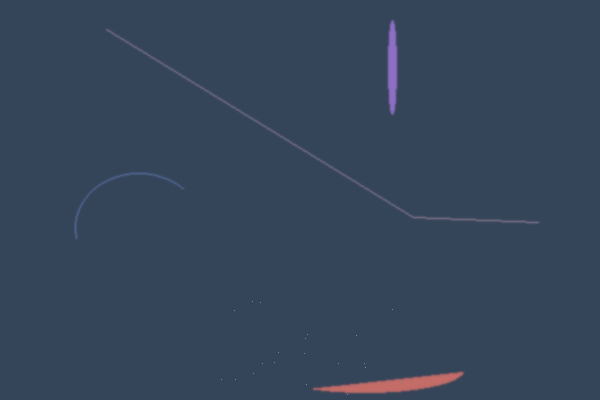

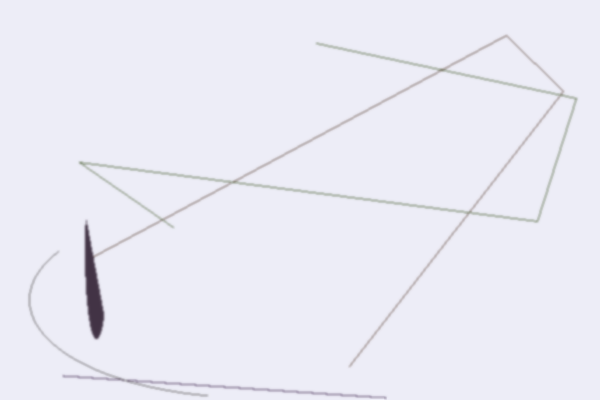

In [1658]:
for i in range(5):
    img = create_modern_art()
    display(img)